# Lecture: Classification


Classification is regression problem where the response variable $Y$ is categorical.

Examples
 - Classify if an email is spam or not
 - Classify an image of a handwritten digit as 0,...,9
 - Classify a picture as a cat or a dog
 - Classify text as sarcasm or not

Because $Y$ is categorical it can only take a finite set of values called __labels__

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import IPython.display
%cd '/content/drive/MyDrive/STAT335_Fall2024/classification/'

Mounted at /content/drive
/content/drive/MyDrive/STAT335_Fall2024/classification


## Example 1 - Binary Classification

Classify if a woman has breast cancer or not (binary classification) based on a set of attributes of cell nuclei in an image scan

In [2]:
from sklearn import datasets

cancer = datasets.load_breast_cancer(as_frame=True)
X, y = cancer.data, cancer.target

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y.head(20)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Example 2 - Multinomial Classification

Classify if an image of a handwritten digit is 0, 1, 2, 3, 4, 5, 6, 7, 8, or 9. Multi-class classification

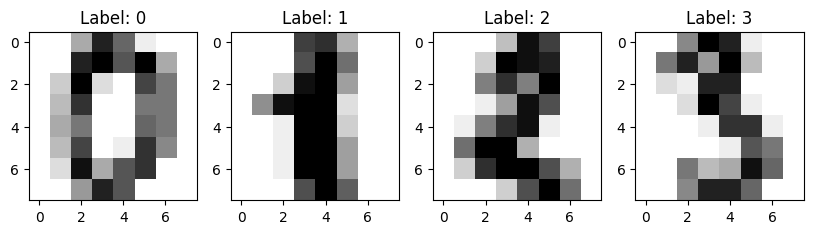

In [4]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Label: %i" % label)

## Building a classifier

To build statistical / ML models we need three things

1. Data -- $X$ and $Y$, observed as $(x_1, y_1),...,(x_n, y_n)$
2. Model family $\mathcal{F}$ -- Possible relationships between $X$ and $Y$
3. Loss function $\mathcal{L}$  -- Finds the best model

Our model of the data will no longer be additive. __This does not make sense__
$$
Y = f(X) + \epsilon
$$

Why -- $Y$ can only take finite values

Instead, our underlying probabilistic model (binary) is that
$$
\begin{align}
Y &\sim Bernoulli(p) \\
p &= f(X)
\end{align}
$$

https://en.wikipedia.org/wiki/Bernoulli_distribution


or for multinomial ($k$ classes)
$$
\begin{align}
Y &\sim Categorical(p_1,...,p_k) \\
(p_1,...,p_k) &= f(X)
\end{align}
$$

https://en.wikipedia.org/wiki/Categorical_distribution

That is instead of modeling membership in classes directly, we model the __probability of being in a class__.
- Classify observations by labeling them whichever class probability is highest

## Decision boundaries

For any classifier there, implicitly or explicitly, exists a boundary separating the two classes in feature space
- This boundary is called the __decision boundary__
- Binary Classification
  - everything on one side of the boundary is class 0
  - everything on the other side is class 1.
- Multiclass
 - Muliple boundaries that separate the feature space into distinct regions

An alternative way to view classification
- Trying to estimate an optimal __decision boundary__ that separates the two (or more) classes

In [5]:
np.random.seed(0)
x = np.vstack([np.random.normal(0, 1, [100, 2]),
               np.random.normal(5, 1, [100, 2])])
y = np.concatenate([np.zeros(100), np.ones(100)])

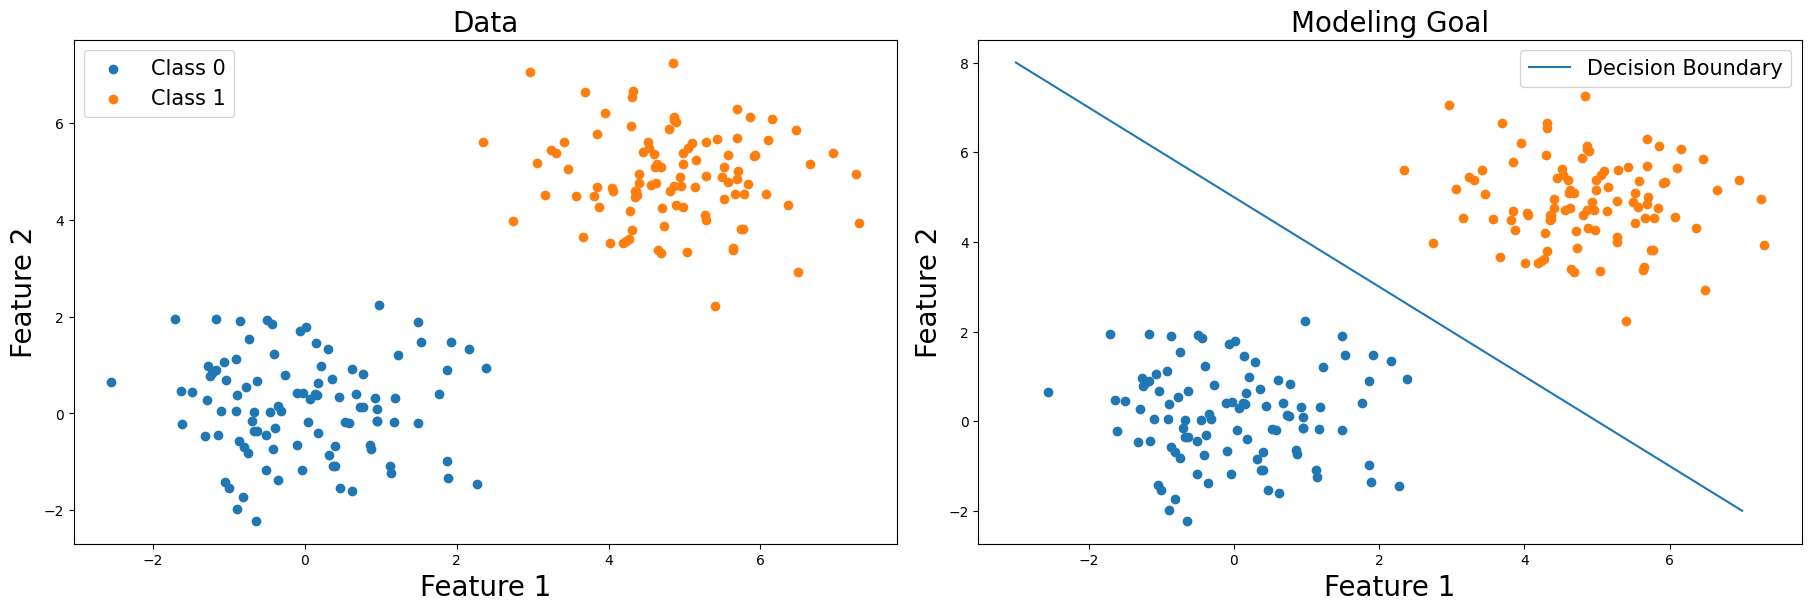

In [6]:
fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (18, 6))

ax[0].scatter(x[y == 0,0], x[y == 0,1], label = 'Class 0')
ax[0].scatter(x[y == 1,0], x[y == 1,1], label = 'Class 1')
ax[0].legend(fontsize = 15)
ax[0].set_title('Data', fontsize = 20)
ax[0].set_xlabel('Feature 1', fontsize = 20)
ax[0].set_ylabel('Feature 2', fontsize = 20)

ax[1].scatter(x[y == 0,0], x[y == 0,1])
ax[1].scatter(x[y == 1,0], x[y == 1,1])
ax[1].plot((7, -3), (-2, 8), label = 'Decision Boundary')
ax[1].legend(fontsize = 15)
ax[1].set_title('Modeling Goal', fontsize = 20)
ax[1].set_xlabel('Feature 1', fontsize = 20)
ax[1].set_ylabel('Feature 2', fontsize = 20)

plt.show()

The goal is to use all of the features in the dataset to construct a decision boundary that best __separates__ the two (or more) classes into distinct regions
  - Classify new examples depending on which side of the boundary their on

The distance between each data point and the decision boundary is called the __margin__
  - You want the margin to be as large as possible
  - Can prove that larger margins lead to better generalization

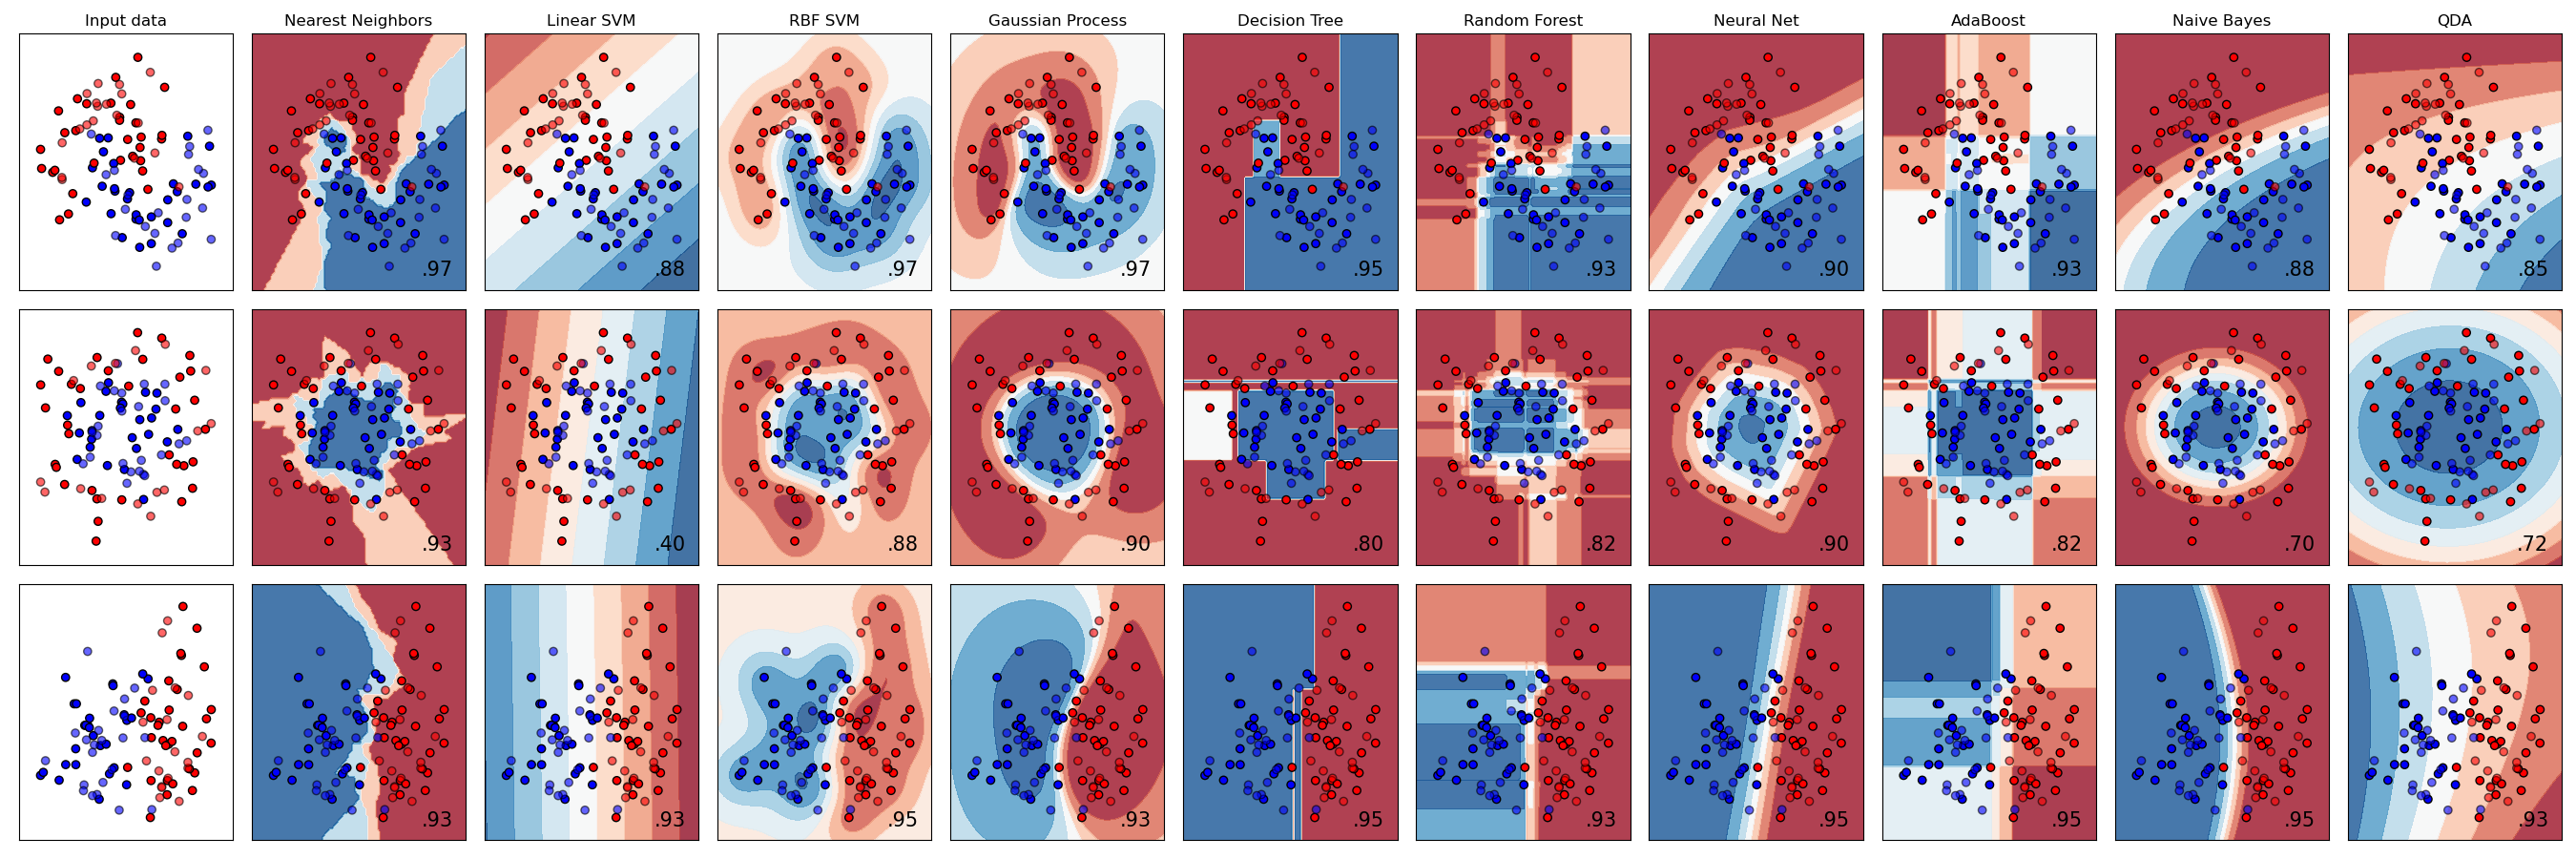

In [7]:
from IPython import display
display.Image('sphx_glr_plot_classifier_comparison_001.png', width = 1400, height = 500)

There many different classifiers (examples above) that imply many different decision boundaries for the same data

- Can learn a lot about the robustness and stability of your algorithm by inspecting the decision boundary (not always possible)
- Simpler boundaries that cleanly separate the data are better than complex boundaries that narrowly separate the data
- Simple large margin classifier > complex small margin classifier

This is another example of the __bias variance__ tradeoff

- High bias models like Linear SVM place a lot of structure on the decision boundary, but don't capture the complexities of the boundaries well (low variance)

- Low bias models like nearest neighbors place very little structure on the decision boundary, but may overestimate the complexity of the boundary (high variance)

- RBF and Gaussian Process seem to trade off bias and variance well

# Lecture :  Logistic Regression

`Logistic Regression` is one of the most simple and commonly used Machine Learning algorithms for two-class (binary) classification. It is easy to implement and can be used as the baseline for any binary classification problem. Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the relationship between one response binary variable (yes or no) and some independent variables (predictors).

The combination of `Logistic Regression` and `Linear Regression` is the backbone of the `Deep Neural Networks`

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import warnings
warnings.filterwarnings("ignore")


from google.colab import drive
drive.mount('/content/drive')
import IPython.display
%cd /content/drive/MyDrive/stat335fall22/Lectures/Lecture9-Classification

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/stat335fall22/Lectures/Lecture9-Classification'
/content/drive/MyDrive/STAT335_Fall2024/classification


# 1. Linear regression v.s. logistic regression

We first looked at linear regression to model continuous targets
 - An example of the continuous output is `house price` and `stock price`.

Now lets introduce its classification counterpart __logistic regression__ to model categorical targets
- Examples of categorical outputs: medical (`cancer vs. not cancer`), finance (`default vs. no default`).

You can also construct categorical targets from continuous ones.  For example, suppose salespeople at a car dealership get a bonus once they reach 30 sales in a month.  You can create a binary variable `30 or more sales in a month vs. less than 30 sales in a month`.

We will focus on binary classification for now.

## Models

In a binary classification problem we have covariate $X$ and response $Y$. $Y$ can only take on values of 0 and 1. No restriction on $X$, could be continuous or categorical itself.

The variable $Y$ follows a Bernoulli distribution, so we will model the underlying probability $p = P(Y = 1)$.

We could consider two different models:

#### Linear regression
$$
p = \beta_0 + \beta_1 X
$$

#### Logistic regression
$$
logit(p) = log(p/(1-p)) = \beta_0 + \beta_1 X
$$

The diagram below shows the estimated probability functions for each model

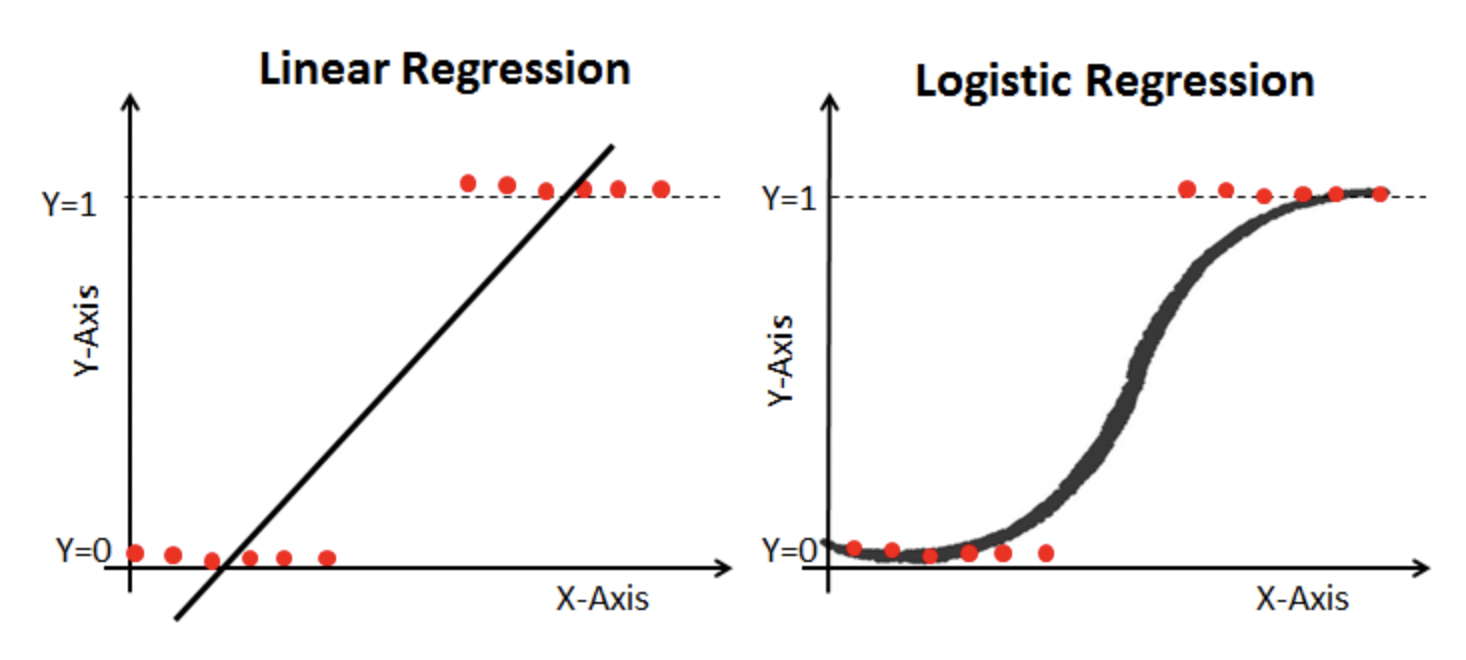

In [9]:
IPython.display.Image('compare_linear_logistic.png', width = 900, height = 500)

Both models have (roughly) the same decision boundary.
 - From this point of view they are (roughly) equivalent.

On the other hand,
 - Linear model can return nonsensical (<0 and >1) probabilities. Near the decision boundary, the linear model is __underconfident__ (i.e. probabilities are closer to 0.5 than neccessary)
 - Logistic regression returns valid probabilities and has more appropriate confidence around the decision boundary




Logistic regression uses the `sigmoid function` to predict the probability $p = P(Y=1)$.

## Sigmoid function

$$   \sigma(x) =  \frac{\exp{(x)}}{1 + \exp{(x)}} \hskip 5mm  -\infty < x <\infty $$


- The sigmoid function, also called the logistic function, gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1.
- If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0.
- If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO.


## Logit function

$$
\text{logit}(p) = \log \frac{p}{1 - p}
$$

The logit function is the inverse of the sigmoid function.
$$
p = \text{logit}(\sigma(p))
$$

Meaning
- Can take any number $x$ between $-\infty$ and $\infty$ and convert it to a probability $p$ between $0$ and $1$ by applying the sigmoid function to $x$
- Can take a probability $p$ between $0$ and $1$ and convert it into a real number $x$ between $-\infty$ and $\infty$ by applying the logit function to $p$

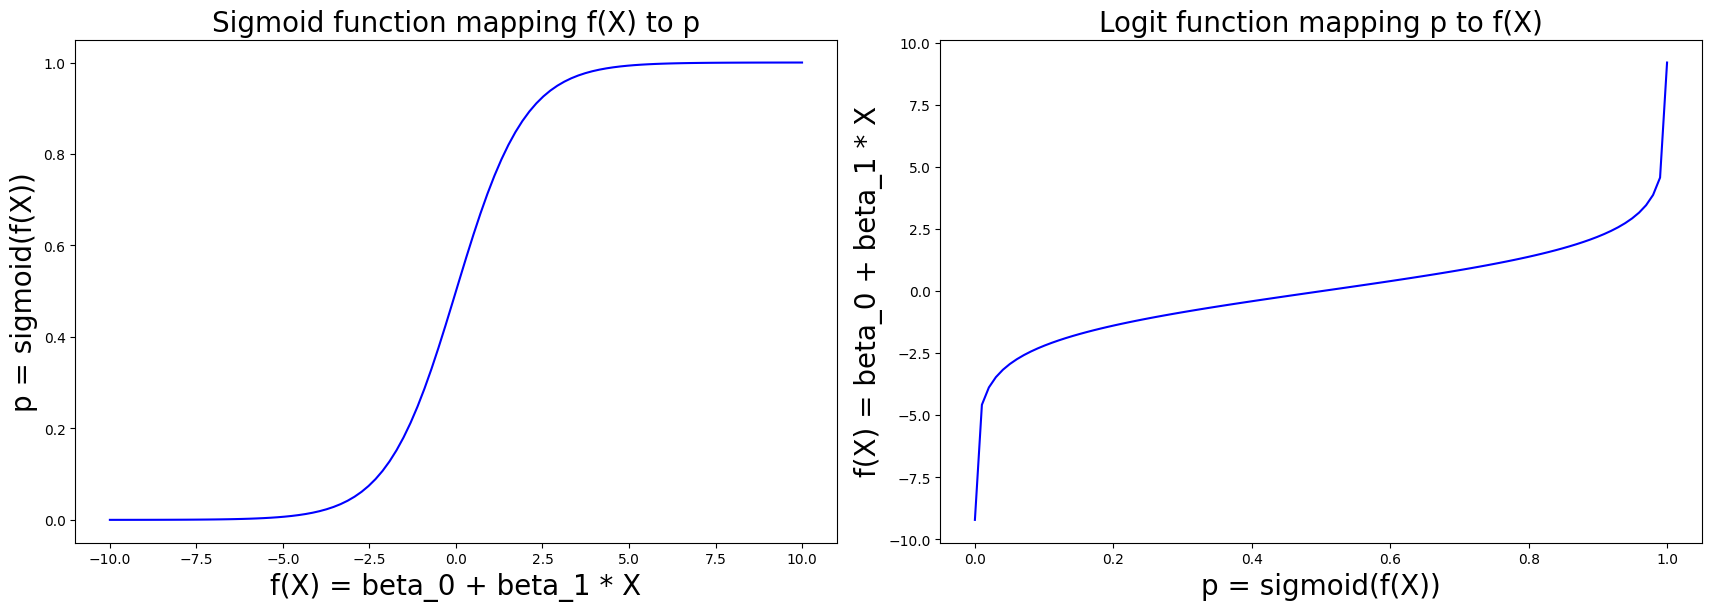

In [10]:
x_grid  = np.linspace(-10, 10, 100)
sigmoid = np.exp(x_grid)/(1 + np.exp(x_grid))

fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (17, 6))
ax[0].plot(x_grid, sigmoid,  color = "blue");
ax[0].set_xlabel('f(X) = beta_0 + beta_1 * X', fontsize = 20)
ax[0].set_ylabel('p = sigmoid(f(X))', fontsize = 20)
ax[0].set_title('Sigmoid function mapping f(X) to p', fontsize = 20)

p_grid  = np.linspace(1e-4, 1-1e-4, 100)
logit = np.log(p_grid / (1 - p_grid))

ax[1].plot(p_grid, logit,  color = "blue");
ax[1].set_ylabel('f(X) = beta_0 + beta_1 * X', fontsize = 20)
ax[1].set_xlabel('p = sigmoid(f(X))', fontsize = 20)
ax[1].set_title('Logit function mapping p to f(X)', fontsize = 20)

plt.show()

# 2. Logistic Regression

We want to classify two classes as either 0 or 1
 - In the credit example -- Default = 1 and Non-Default = 0

We cast this as a regression problem by instead modeling the underlying class probabilities (conditional on covariate / feature information)

Logistic regression
$$
\text{logit}(p) = \beta_0 + \beta_1 X
$$

$\text{logit}(p)$ is a real number between $-\infty$ and $\infty$ so linear regression of the logits is perfectly valid

Implicitly this is modeling the positive class probability $p$ as
$$
p = \sigma(\beta_0 + \beta_1 X)
$$


## 2.2  Estimating the parameters $\beta_0$, $\beta_1$

In regression we minized MSE and all was well.

In classification our probability model is a bit different. We need to learn the underlying class probabilities that gave rise to our data. We assumed that

$$
Y \sim Bernoulli(p) \\
p = \sigma(\beta_0 + \beta_1 X)
$$
i.e. that the class probability are squashed linear function of the covariates $X$

or more succinctly
$$
Y \sim Bernoulli(\sigma(\beta_0 + \beta_1 X))
$$



Unlike the linear regression, the estimates of the intercept and the slopes do not have an exact mathematical expression.

The coefficients are estimated after maximizing bernoulli likelihood using the training data $(Y_1, X_1), \ldots, (Y_n, X_n)$.

Recall that the bernoulli likelihood for $n$ data points $Y_1,...,Y_n$ is
$$L(\beta_0, \beta_1) = \prod_{i = 1}^n  p_i^{Y_i}(1 - p_i)^{1 - Y_i} $$

Rewrite using our assumed logistic regression model to introduce dependence on $X$

$$L(\beta_0, \beta_1) = \prod_{i = 1}^n  \sigma(\beta_0 + \beta_1X_i)^{Y_i}\Big(1 - \sigma(\beta_0 + \beta_1X_i)\Big)^{1 - Y_i} $$

Maximizing $\log(L)$ same as maximizing $L$

$$ \log L(\beta_0, \beta_1) = \sum_{i = 1}^n Y_i \log \big(\sigma(\beta_0 + \beta_1X_i)\big) + (1 - Y_i) \log \Big(1 - \sigma(\beta_0 + \beta_1X_i)\Big)
$$

The above is the standard loss function for logistic regression. Maximizing the above finds the $\beta_0$ and $\beta_1$ that best predict the underlying class probabilities

Side note: Maxmizing the above is the same as minimizing
$$
 \mathcal{L}(\beta_0, \beta_1) = -\frac{1}{n}\sum_{i = 1}^n Y_i \log \big(\sigma(\beta_0 + \beta_1X_i)\big) + (1 - Y_i) \log \Big(1 - \sigma(\beta_0 + \beta_1X_i)\Big)
$$

which is known as the `binary cross entropy (BCE)`

Minimizing BCE = maximizing the (bernoulli) likelihood

## Prediction

Once you have estimated $\hat \beta_0$ and $\hat \beta_1$ you can make predictions (classifications) for a new covariate $x^*$

This follows a three step procedure

1. Calculate the linear prediction to get the logit($\hat p$)
$$
logit(\hat p) = \hat \beta_0 + \hat \beta_1 x^*
$$
2. Invert logit($\hat p$) with the sigmoid function to get $\hat p$.
$$
\hat p = \sigma(logit(\hat p)) = \sigma(\hat \beta_0 + \hat \beta_1 x^*)
$$
3. Convert class probability into a class prediction
$\hat y = 1$ if $\hat p > 0.5$

You can use different thresholds other than 0.5, but this needs to be justified.  For example, in predicting rare events that can have severe consequences for inaccuracy (e.g. fraud, rare disease).

### Use Sklearn to fit LogisticRegression  `sklearn.linear_model`

In [11]:
from sklearn.linear_model import LogisticRegression

import the Logistic Regression module and create a Logistic Regression classifier object using `LogisticRegression()` function.

Then, fit your model on the train set using `fit()` and perform prediction on the test set using `predict()`.

In [12]:
# load dataset

default = pd.read_csv("Default.csv")
default.head(5)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


Next, we divide the given columns features (X) and targets (y)

In [13]:
#split dataset in features and target variable
X = default['balance'] # feature
y = default['default'] # Target variable
# y.default

In [14]:
y.head()

,default
0,No
1,No
2,No
3,No
4,No


In [15]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [16]:
np.array(X_train).reshape(-1,1)

array([[1008.94653988],
       [1060.80742927],
       [1971.66323616],
       ...,
       [ 687.0644195 ],
       [  46.01022532],
       [ 337.57599989]])

## 2.2. Logistic Regression

First, import the Logistic Regression module and create a Logistic Regression classifier object using `LogisticRegression()` function.

Then, fit your model on the train set using `fit()` and perform prediction on the test set using `predict()`.

In [17]:
# instantiate the model (using the default parameters)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# fit the model with data
X_train_re = np.array(X_train).reshape(-1,1)
X_test_re  = np.array(X_test).reshape(-1,1)

model.fit(X_train_re, y_train)

LogisticRegression()

In [18]:
# check the coefficients
model.intercept_, model.coef_

(array([-10.62361398]), array([[0.00544455]]))

In [19]:
def sigmoid(x):
  return np.exp(x)/(1 + np.exp(x))

sigmoid(model.intercept_ +  model.coef_ * 2000)

array([[0.56598442]])

### Prediction

Predict that the default probability for an individual with a balance of $1, 000 is

$$\widehat p(1000) = \sigma\big(\widehat\beta_0 + \widehat\beta_{1}1000 \big) = \frac{\exp{\Big(-10.62 + 0.0054*1000 \Big)}}{1 + \exp{\Big(-10.62 + 0.0054*1000 \Big)}} \simeq 0.0056$$


In [20]:
def sigmoid(x):
  return np.exp(x)/(1 + np.exp(x))

sigmoid(model.intercept_ +  model.coef_ * 1000)

array([[0.00560172]])

Exercise : Predict that the default probability for an individual with a balance of $2, 000  :

In [21]:
sigmoid(model.intercept_ +  model.coef_ * 2000)

array([[0.56598442]])

#### Default Thresholding Rule of Logistic : if $\widehat P(X)$ > 0.5  predict the class as `yes` else `No`.

Make predictions with the `predict` method. Same as before. Note that output uses the original labels.

In [22]:
model.predict(X_train_re)

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [23]:
model.predict(X_test_re)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

If you want class probabilities then call `predict_proba`

In [24]:
model.predict_proba(X_train_re)

array([[9.94120309e-01, 5.87969086e-03],
       [9.92216960e-01, 7.78303957e-03],
       [4.72227319e-01, 5.27772681e-01],
       ...,
       [9.98975840e-01, 1.02416048e-03],
       [9.99968739e-01, 3.12609680e-05],
       [9.99847114e-01, 1.52886086e-04]])

In [25]:
#if you want to use a different threshold, you can use the proba object
model.predict_proba(X_train_re)[:,1]>0.5
np.array(["Yes" if x else "No" for x in model.predict_proba(X_train_re)[:,1]>0.3])

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype='<U3')

In [26]:
model.predict_proba(X_test_re)

array([[9.99975666e-01, 2.43339439e-05],
       [9.99788739e-01, 2.11261216e-04],
       [9.92799270e-01, 7.20073039e-03],
       ...,
       [9.98508771e-01, 1.49122903e-03],
       [9.99604222e-01, 3.95778101e-04],
       [9.41455088e-01, 5.85449121e-02]])

Each row is the class probabilities for that observations. Needs to sum to 1.

- 0th column is for the variable coded as 0
- 1st column is for the variable coded as 1

In [27]:
model.predict_proba(X_train_re)[0]

array([0.99412031, 0.00587969])

## 2.4 Evaluating Binary Classifiers

In standard regression we primarily looked at the MSE and R^2 statistic on the test set to measure model performance

In classification
- R^2 is not a meaningful metric (although we can still calculate it)
- MSE is generally not an informative metric

### Confusion matrix

- The primary tool for evaluating binary classifiers is called the __confusion matrix__

- The confusion matrix is a 2x2 table that summarizes predictions against observations
 - Each row represents a class (Positive and Negative in for binary classification)
 - Each column represents your models prediction (Positive v.s. Negative).
 - Each cell represents the number of observations that are in the class specified by the row and in the predicted class specified by the column


In [28]:
y_pred = model.predict(X_test_re)
y_pred.shape

(2500,)

In [29]:
y_pred.squeeze()

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [30]:
y_pred_newthr = np.array(["Yes" if x else "No" for x in model.predict_proba(X_test_re)[:,1]>0.3])
y_pred_newthr.squeeze()

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

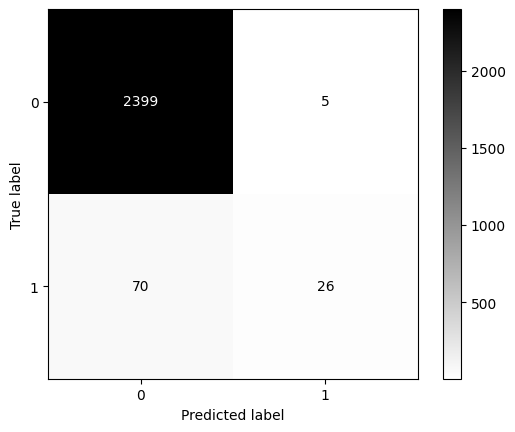

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = metrics.confusion_matrix(y_test.squeeze(), y_pred.squeeze())
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot(cmap = 'binary')
plt.show()

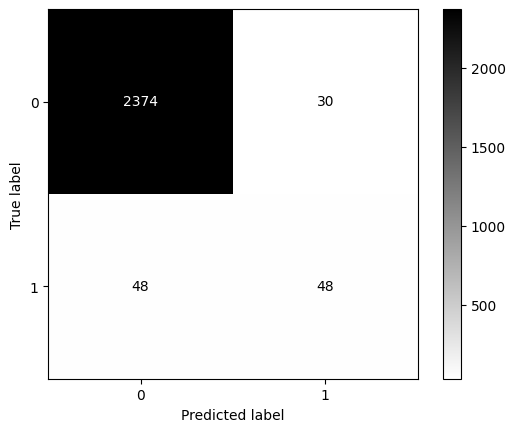

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = metrics.confusion_matrix(y_test.squeeze(), y_pred_newthr.squeeze())
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot(cmap = 'binary')
plt.show()

- Cell (0, 0) is the number of Actual `0`'s that were Predicted as `0`
- Cell (0, 1) is the number of Actual `0`'s that were Predicted as `1`
- Cell (1, 0) is the number of Actual `1`'s that were Predicted as `0`
- Cell (1, 1) is the number of Actual `1`'s that were Predicted as `1`


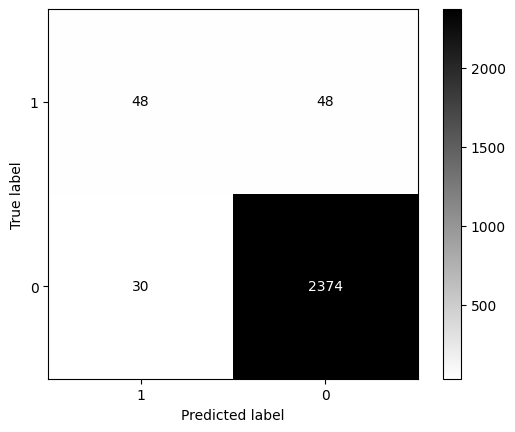

In [33]:
# Most diagrams display with 1s (positive) at the top so we rotate it

conf_matrix_display = ConfusionMatrixDisplay(np.rot90(np.rot90(conf_matrix)), display_labels = [1, 0])
conf_matrix_display.plot(cmap = 'binary')
plt.show()

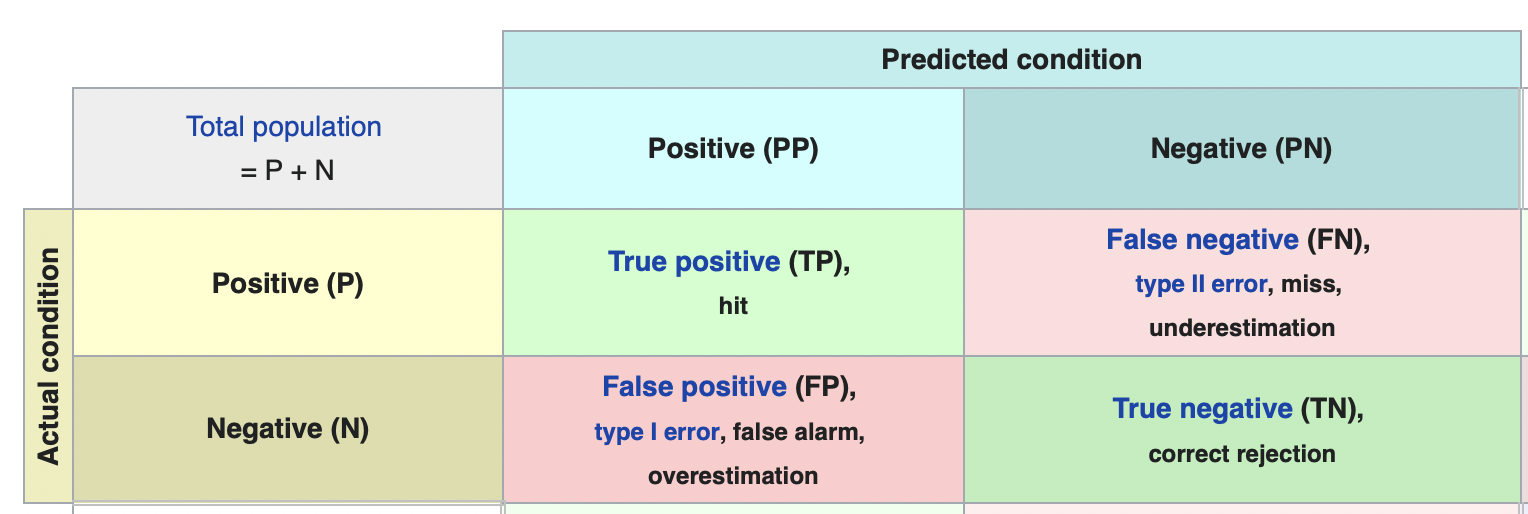

In [34]:
IPython.display.Image('confusion.png', width = 800, height = 400)

- True Positives = Number of Actual `1`'s that were Predicted as `1`
- False Negatives = Number of Actual `1`'s that were Predicted as `0`
- False Positives = Number of Actual `0`'s that were Predicted as `1`
- True Negatives = Number of Actual `0`'s that were Predicted as `0`

## Summarizing the confusion matrix

- From the confusion matrix we can compute any summary metric
- Confusion matrix contains all of the relevant information

### Accuracy (and why its not often used)

Accuracy -- the proportion of observations that are classified correctly

Accuracy = $\frac{\text{# True positives + # True Negatives}}{\text{# Observations}}$ = $\frac{\text{# True positives + # True Negatives}}{\text{# True positives + # True Negatives + # False positives + # False Negatives}}$

In [35]:
# in the credit example

acc = (26 + 2399)/(26 + 70 + 5 + 2399)
acc

0.97

The overall error rate is low, hence the **overall accuracy** is high.

In regression, this was about the best we could do with what we've learned

In classification we can break down accuracy on a class by class basis
 - How accurate is our model in classifying positives (Class 1)
 - How accurate is our model in classifying negatives (Class 0)

### Decomposing the errors

And this can be extremely useful for diagnosing the usefulness of your classifier.

In the credit example the overall accuracy is `97%` (pretty good)

However, if we look at accuracy within each class
- positive = class 1 = labeled as a 1 = defaulted
- negative = class 0 = labeled as a 0 = did not default

In [36]:
print('Positive Accuracy: ', 26 / (26 + 70))
print('Negative Accuracy: ', 2399 / (5 + 2399))

Positive Accuracy:  0.2708333333333333
Negative Accuracy:  0.9979201331114809


The accuracy among those who defaulted (Positive cases) is very low. Our model is very bad at identifying people who defaulted. Useless!

From the perspective of a credit card company that is trying to identify high-risk individuals, an accuracy of `27%` is very bad

In [37]:
# more generally we care about the accuracy within each class
print('Class 1 Accuracy: ', 26 / (26 + 70))
print('Class 0 Accuracy: ', 2399 / (5 + 2399))

Class 1 Accuracy:  0.2708333333333333
Class 0 Accuracy:  0.9979201331114809


### Sensitivity (positive accuracy)

Sensitivity is the True Positive _Rate_
 - a.k.a positive accuracy rate
 - a.k.a class 1 accuracy rate
 - a.k.a recall

Sensitivity is your ability to successfully classify `1`s as `1`s
 - Ususally the class of interest (positive disease status) is coded as a `1`

Proportion of observations that __do__ have the condition that are classified as __having__ the condition
  - e.g. Given you have covid, sensitivity is the probability our model will correctly detect you have covid
  - e.g. Given an image of a cat, sensitivity is the probability of correctly classifying that image as `cat`
  - Sensitivity measures how powerful our method is in detecting (classifying) the thing we're trying to detect (classify)
  - High sensitivity means more cases are detected / do not go undetected

Sensitivity = $\frac{\text{# True positives}}{\text{# Positives}}$ = $\frac{\text{# True positives}}{\text{# True Positives + # False Negatives}}$


### Specificity (negative accuracy)

Specificity is the True Negative _Rate_
 - a.k.a negative accuracy rate
 - a.k.a class 0 accuracy rate

Specificity is your ability to successfully classify `0`s as `0`s
 - Ususally the class not of interest (negative disease status) is coded as a `0`

Proportion of observations that __do not__ have the condition that are classified as __not having__ the condition
  - e.g. Given you do not have covid, specificity is the probability our model will correctly detect you not having covid
  - e.g. Given an image of not a cat, specificity is the probability of correctly classifying that image as `not a cat`
  - Specificity measures how powerful our method is in detecting (classifying) the thing we're not trying to detect (classify)
  - Higher specificity means fewer healthy people are labeled as sick

Specificity = $\frac{\text{# True Negatives}}{\text{# Negatives}}$ = $\frac{\text{# True Negatives}}{\text{# True Negatives + # False Positives}}$


In [38]:
# use the ravel() method to list out all of the elements of the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, model.predict(X_test_re))
tn, fp, fn, tp = cnf_matrix.ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print(sensitivity, specificity)

0.2708333333333333 0.9979201331114809


* `sensitivity = TP/P = TP/(TP + FN)`.

* `specificity = TN/N = TN/(TN + FP)`.

We can see that these are the same as the postive accuracy and negative accuracy computed above


### In summary

In classification we break accuracy down to inspect the accuracy within each class

In binary classification we label the targets as `1` and `0`
- Positive accuracy = sensitivity = proportion of `1`'s that are correctly classified
- Negative accuracy = specficity = proportion of `0`'s that are correctly classified

If you swap the labeling then sensitivity and specificity will swap
 - Often there will be one class of interest (positive disease status), which you will naturally code as 1
 - When in doubt, be clear and include your confusion matrix

https://en.wikipedia.org/wiki/Sensitivity_and_specificity

## 2.4 Imbalance data problem :

Imbalanced data is why accuracy is not a useful metric for classification

In [39]:
# image extremely imbalanced reponse (99 zeros and 1 ones)
y = np.concatenate([np.zeros(99), np.ones(1)])

# pick a dumb model - one that picks 0 every single time
yhat = np.zeros(100)

metrics.accuracy_score(y, yhat)

0.99

wow amazing prediction. Not very helpful if identifying that 1 was important though.

In [40]:
conf_matrix = metrics.confusion_matrix(y, yhat)

tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print(sensitivity, specificity)

0.0 1.0


- Sensitivity - The model never picks 1, 0% of the positive cases are identified
- Specificity - The model always picks 0, so 100% of the negative cases are identified

### Handling imbalanced data in Logistic regression

- Imbalanced data is a problem because our model is trained to reduce the overall error across all classes simultaneously
- Our loss function does not try to minimize errors _within_ each class
- Thus if one class is very large and the other is very small, the overall error can be made small by doing well on the big class without regard to the small class
- From the point of view of the loss function, the small class is not important
- Unless youre lucky you will end up with high accuracy on the large class and low accuracy on the small class. Either - high sensitivity and low specificity or low sensitivity and high specificity.

We can mitigate this problem by telling the loss function that the small class is important
 - We do this by weighting the loss function by class
 - Losses in the big class recieve small weights (mistakes become less important)
 - Losses in the small class recieve big weights (mistakes become more important)



The simplest approach is to weight by the inverse size of the class

E.x.

You have 1000 observations
 - 900 observations are in class 1
 - 100 observations are in class 0

When computing the loss function we weight
- Loss in class 1 by 1000/900 = 1.11
- Loss in class 0 by 1000/100 = 10

Typically normalize these to sum to 1
- weight1 = 1.11 / (1.11 + 10) $\approx$ 0.1
- weight0 = 10 / (1.11 + 10) $\approx$ 0.9

#### Credit example

In sklearn we can train logistic regression using this weighting scheme by setting `class_weight= "balanced"` in our call to `LogisticRegression`

In [41]:
model = LogisticRegression(class_weight= "balanced")
model.fit(X_train_re, y_train)
y_pred = model.predict(X_test_re)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2069,  335],
       [  12,   84]])

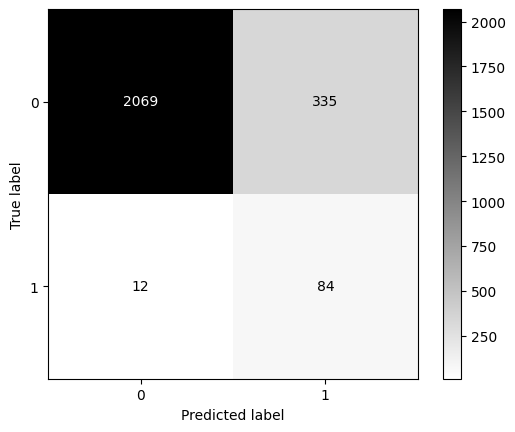

In [42]:
cnf_matrix = metrics.confusion_matrix(y_test, model.predict(X_test_re))
conf_matrix_display = ConfusionMatrixDisplay(cnf_matrix)
conf_matrix_display.plot(cmap = 'binary')

In [43]:
tn, fp, fn, tp = cnf_matrix.ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print(sensitivity, specificity)

0.875 0.860648918469218


Sensitivity has increased dramatically
 - The 1 class (positive class) was severely underrepresented.
 - Weighting increased its relative important to the loss function
 - Making a mistake on classifying `1` is far more costly than making a mistake on `0`
 - Thus to improve the overall (weighted) loss our model is encouraged to do well on `1`
 - yay!

The cost was that specificity dropped
 - Need to decide if this is an acceptable trade off or not
 - I.e. are we more okay with false positives or false negatives?


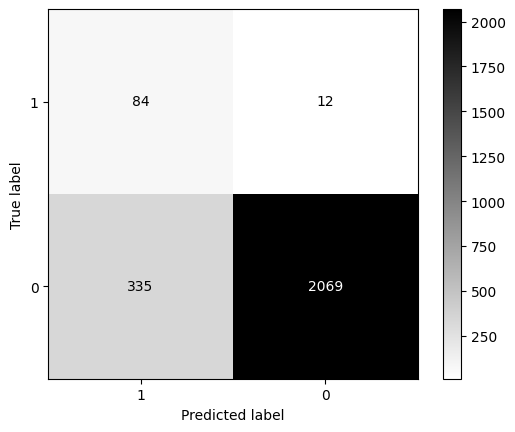

In [44]:
conf_matrix_display = ConfusionMatrixDisplay(np.rot90(np.rot90(cnf_matrix)), display_labels = [1, 0])
conf_matrix_display.plot(cmap = 'binary')
plt.show()

### F scores

One way to summarize the overall performance of a classification model is through the $F_1$ score

$$
F_1 = \frac{2tp}{2tp + fp + fn}
$$

$F_1$ ranges from $0$ to $1$
 - $1$ means all observations in both classes are perfectly predicted
 - $ < 1$ means some observations are incorrectly predicted


In [45]:
model = LogisticRegression()
model.fit(X_train_re, y_train)
y_pred = model.predict(X_test_re)
cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cnf_matrix1.ravel()

f1 = (2*tp) / (2*tp + fp + fn)
f1

0.4094488188976378

In [46]:
model = LogisticRegression(class_weight= "balanced")
model.fit(X_train_re, y_train)
y_pred = model.predict(X_test_re)
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cnf_matrix2.ravel()

f1 = (2*tp) / (2*tp + fp + fn)
f1

0.3262135922330097

In terms of $F_1$ score, weighting has deteriorated the overall model performance
 - However, we do not care about overall performance as much as we do the sensitivity
 - Need to judge on a case by case basis which models solves the actual problem youre trying to solve

# Example 1 - Breast Cancer Classification

In this example we will use the features of a cell nuclei to determine if a woman has breast cancer or not

We will build a logistic regression model and evaluate its performance

Now we will use many features so this is multivariate logistic regression

In [47]:
from sklearn import datasets
from sklearn.metrics import ConfusionMatrixDisplay

cancer = datasets.load_breast_cancer(as_frame=True)
x, y = cancer.data, cancer.target

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

lm = LogisticRegression()
lm.fit(x_train, y_train)
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)

In [49]:
print("Train")
# print('MSE -', np.mean((y_train - yhat_train)**2))
print('Acc -', lm.score(x_train, y_train))

print("\n")
print("Test")
# print('MSE -', np.mean((y_test - yhat_test)**2))
print('Acc -', lm.score(x_test, y_test))

Train
Acc - 0.9553805774278216


Test
Acc - 0.9680851063829787


In [50]:
conf_matrix = metrics.confusion_matrix(y_test, yhat_test)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print(sensitivity, specificity, f1)

0.9752066115702479 0.9552238805970149 0.9752066115702479


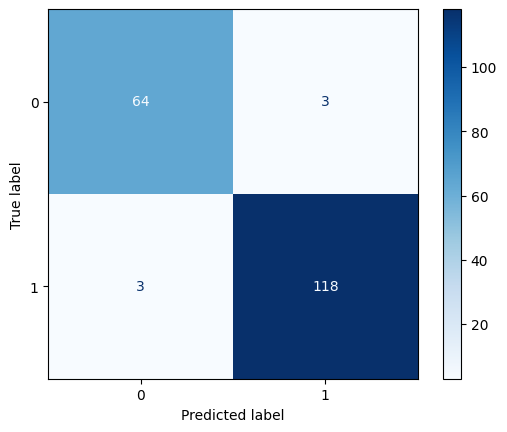

In [51]:
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot(cmap = 'Blues')

# Example 2 - Image classification

We will do a much much simpler version of standard image classification
 - Classify each handwritten digit as 1 or 0
 - Use logistic regression

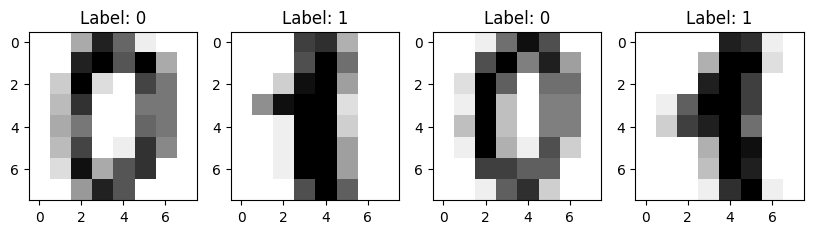

In [52]:
from sklearn import datasets
digits = datasets.load_digits()

x, y = digits.data, digits.target
x = x[np.isin(y, [0, 1])]
y = y[np.isin(y, [0, 1])]

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, x, y):
    ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r)
    ax.set_title("Label: %i" % label)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

lm = LogisticRegression()
lm.fit(x_train, y_train)
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)

In [54]:
print("Train")
# print('MSE -', np.mean((y_train - yhat_train)**2))
print('Acc -', lm.score(x_train, y_train))

print("\n")
print("Test")
# print('MSE -', np.mean((y_test - yhat_test)**2))
print('Acc - ', lm.score(x_test, y_test))

Train
Acc - 1.0


Test
Acc -  1.0


In [55]:
conf_matrix = metrics.confusion_matrix(y_test, yhat_test)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print(sensitivity, specificity, f1)

1.0 1.0 1.0


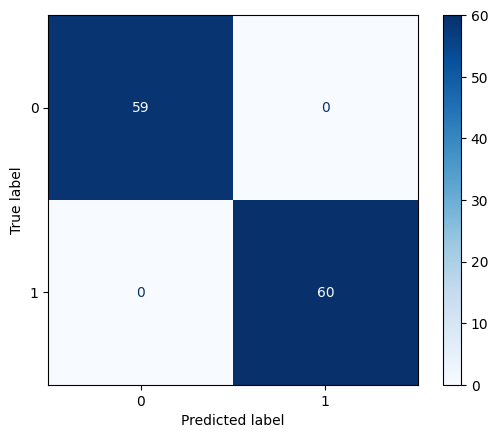

In [56]:
conf_matrix = metrics.confusion_matrix(y_test, yhat_test)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot(cmap = 'Blues')

### How are we making these predictions

Three steps

1. Compute the linear model $\beta_0 + \sum_{i = 1}^{64} \beta_i x_i$ where $x_i$ means the $i$th pixel

2. Squash the linear model to be between 0 and 1 with the sigmoid function to get a predicted probability $\hat p = \sigma(\beta_0 + \sum_{i = 1}^{64} \beta_i x_i)$

3. Convert probabilities into 0s and 1s by testing if $\hat p > 0.5$

In [57]:
# 1. Compute the linear function of the inputs (beta0 + beta1 * X)
logit_p = lm.intercept_ + np.sum(lm.coef_ * x_train[3])
logit_p

array([-12.57875218])

In [58]:
# 2. Run the linear function through the sigmoid to squash it between 0 and 1
def sigmoid(x):
  return np.exp(x)/(1 + np.exp(x))

p_pred = sigmoid(logit_p)
p_pred

array([3.44441795e-06])

In [59]:
# 3. Convert to a classification
y_pred = 1.0*(p_pred > 0.5)
y_pred

array([0.])

What was important to the logistic regression?

- Each feature is the pixel value
- Get a beta coefficient for each pixel
- Plot betas as image

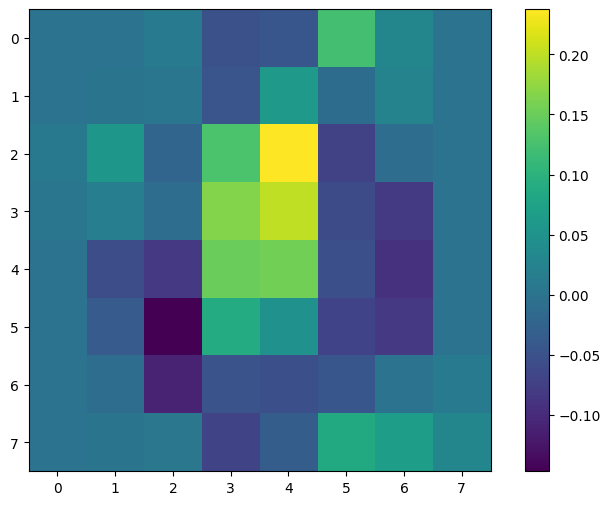

In [60]:
plt.figure(figsize = (9, 6))
plt.imshow(lm.coef_.reshape(8, 8))
plt.colorbar()
plt.show()

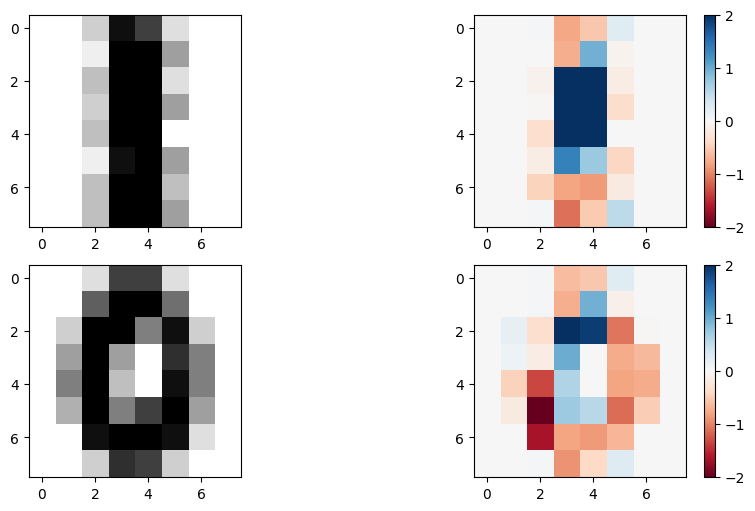

In [61]:
## apply this map to each input image to see what was important in each image

fig, ax = plt.subplots(2, 2, constrained_layout = True, figsize = (8, 5))

m = 0
ax[0,0].imshow(x_test[m].reshape(8, 8), cmap = 'binary')
im = ax[0,1].imshow((lm.coef_ * x_test[m]).reshape(8, 8), cmap = 'RdBu', vmin = -2, vmax = 2)
fig.colorbar(im)

m = 1
ax[1,0].imshow(x_test[m].reshape(8, 8), cmap = 'binary')
im = ax[1,1].imshow((lm.coef_ * x_test[m]).reshape(8, 8), cmap = 'RdBu', vmin = -2, vmax = 2)

plt.colorbar(im)
plt.show()

- Blue regions made the logistic regression think it was a 1
- Red regions made it think it was a 0

# Multi-target logistic regression

In a scientific / engineering / clinical setting you may often have just two targets because there is one thing youre trying to detect
 - Does someone have a disease or not
 - Will this part fail

However, there could be many different classes you want to predict. We want one model that can discriminate between many different classes simultaneously.

In sklearn this is incredibly easy. You simply give it a target vector that has multiple classes.

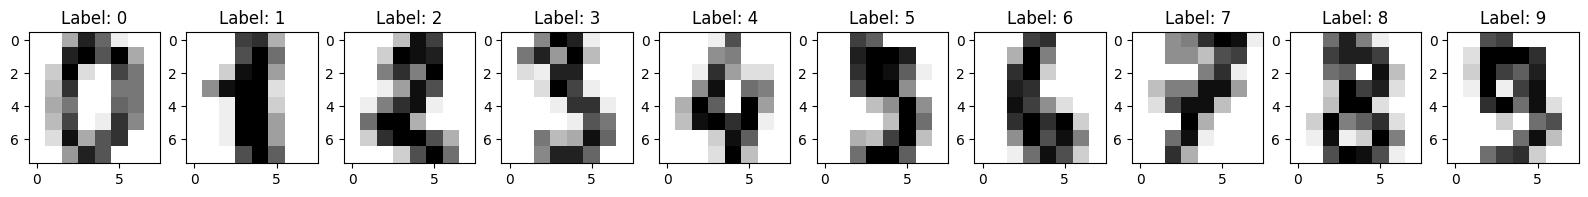

In [62]:
from sklearn import datasets
digits = datasets.load_digits()

x, y = digits.data, digits.target

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, x, y):
    ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r)
    ax.set_title("Label: %i" % label)

In [63]:
x.shape

(1797, 64)

In [64]:
x += np.random.normal(0, 3, x.shape)

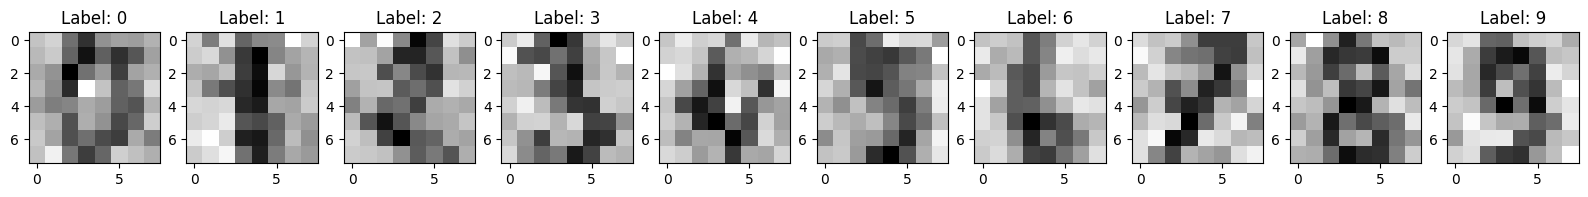

In [65]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, x, y):
    ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r)
    ax.set_title("Label: %i" % label)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

lm = LogisticRegression()
lm.fit(x_train, y_train)
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)

In [67]:
lm.predict_proba(x_train)

array([[9.98172962e-25, 1.00000000e+00, 2.95593333e-28, ...,
        4.85235661e-24, 1.39612924e-13, 2.00532643e-14],
       [1.93205662e-16, 9.69861369e-01, 1.18916187e-02, ...,
        3.97763122e-05, 1.81982084e-02, 1.33797934e-10],
       [7.01313965e-08, 2.88169658e-09, 9.74204515e-06, ...,
        3.75794960e-09, 9.98658230e-01, 1.33194967e-03],
       ...,
       [4.01032927e-17, 2.07735087e-10, 9.99999198e-01, ...,
        3.54150971e-10, 5.90490131e-07, 1.46821356e-14],
       [3.10531183e-08, 2.01141991e-06, 1.79268302e-15, ...,
        9.99848104e-01, 6.53666731e-11, 4.26477054e-09],
       [4.85978113e-14, 9.99994449e-01, 3.70185377e-09, ...,
        2.35835642e-10, 1.31594172e-06, 3.25435305e-16]])

In [68]:
lm.predict_proba(x_train).shape

(1203, 10)

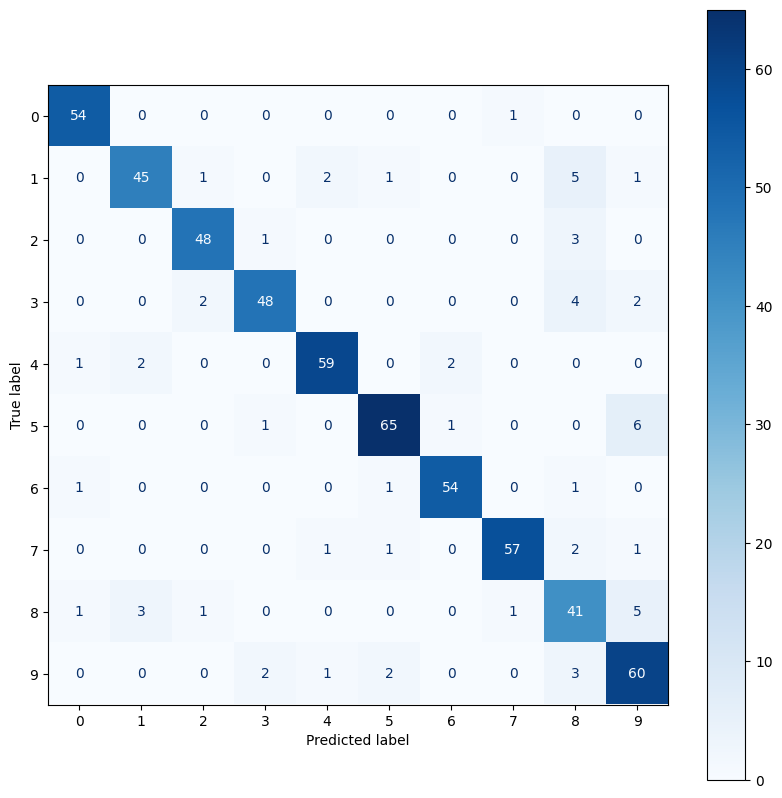

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = metrics.confusion_matrix(y_test, yhat_test)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)

fig, ax = plt.subplots(figsize=(10, 10))
conf_matrix_display.plot(ax = ax, cmap = 'Blues')

All of the principles that we learned in binary classification remain the same. We can even compute (some) of the same metrics.

- Recall -- This is the sensitivity of your model for a given class.
  - Probability that an observation actually in class 1 is classified as class 1

- Precision -- Is the ``probabilistic inverse`` of Recall (still want this to be 1)
  - Probability that an observation classified as class 1 is actually in class 1

- F1-score is the harmonic mean of precision and recall

- Support -- is the number of observations in each class. Can use this assess imbalance issues.

E.g.

Precision (class 1) = $P(\text{actually in class 1} \mid \text{predicted in class 1})$

Recall (class 1) = $P(\text{predicted in class 1} \mid \text{actually in class 1})$

or

Precision (class 1) = $\frac{\text{# Predicted to be in class 1 and is in actually in class 1}}{\text{# Predicted to be in class 1}}  = \frac{\text{#True Positives}}{\text{# Predicted positives}} = \frac{TP}{TP + FP}$

Recall (class 1) = $\frac{\text{# Predicted to be in class 1 and is in actually in class 1}}{\text{# Actually in class 1}}  = \frac{\text{#True Positives}}{\text{# Actual positives}} = \frac{TP}{TP + FN}$

### Precision

> Given that you're in predicted as class 1, whats the probability that youre actually in class 1?

A model with high precision (in all classes) makes trustworthy predictions
 - If a data point is predicted as class 1, then its likely to actually be in class 1
 - If a data point is predicted as class 2, then its likely to actually be in class 2
 - etc.
 - A model with high precision has very few __false positives__


 You can have high precision in some classes and low precision in others
   - Example:
    - y = (1, 1, 1, 0)
    - y_hat = (1, 1, 0, 0)
   - Every predicted "1" is actually a "1"
   - There were no cases where we predicted a "1" and were wrong
   - there are many cases where we predicted "0" and were wrong though


### Recall
> Given that you're in class 1, whats the probability that you will be predicted as class 1?

A model with high recall (in all classes) makes trustworthy predictions
 - If a data point really is class 1, then its likely to be predicted as class 1
 - If a data point really is class 2, then its likely to be predicted as class 2
 - etc.
 - A model with high recall has little to no __false negatives__

You can have high recall in some classes and low recall in others
   - Example:
    - y = (1, 1, 0, 0)
    - y_hat = (1, 1, 1, 1)
   - Every real "1" is predicted as "1"
   - There were no cases where y was "1" and our model was wrong
   - All of the actual "0"s were wrong though

## F1-Score

They are trying to gaurantee two converse statements
 1. Being in a given class means you will likely be predicted in that class
 2. Being predicted to be a in a class means you are likely in that class

If both numbers are high (near 1) then our model is very rarely confused because it can confidently distinguish between all classes.

The F1 score combines this information into a single measure by taking the harmonic mean of the two scores

$$
F_1 = \frac{2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}}
$$

In [70]:
class_report = metrics.classification_report(y_test, yhat_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.90      0.82      0.86        55
           2       0.92      0.92      0.92        52
           3       0.92      0.86      0.89        56
           4       0.94      0.92      0.93        64
           5       0.93      0.89      0.91        73
           6       0.95      0.95      0.95        57
           7       0.97      0.92      0.94        62
           8       0.69      0.79      0.74        52
           9       0.80      0.88      0.84        68

    accuracy                           0.89       594
   macro avg       0.90      0.89      0.89       594
weighted avg       0.90      0.89      0.90       594



In [71]:
# precision
np.round(np.diag(conf_matrix / np.sum(conf_matrix, axis = 0)), 2)

array([0.95, 0.9 , 0.92, 0.92, 0.94, 0.93, 0.95, 0.97, 0.69, 0.8 ])

In [72]:
# recall
np.round(np.diag(conf_matrix / np.sum(conf_matrix, axis = 1)), 2)

array([0.98, 0.82, 0.92, 0.86, 0.92, 0.89, 0.95, 0.92, 0.79, 0.88])